In [1]:
from CPD import datasets, loss, models
from CPD import new_metrics as metrics

%load_ext autoreload
%autoreload

import pytorch_lightning as pl
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_dim, n_layers, drop_prob=0.5):
        
        super(LSTM, self).__init__()
        self.input_size = input_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim        
        self.lstm = nn.LSTM(input_size, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)
        self.activation = nn.Sigmoid()
        
    def forward(self, input_seq):
        batch_size = input_seq.size(0)
        lstm_out, hidden = self.lstm(input_seq.float())  
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)      
        out = self.linear(lstm_out)
        out = self.activation(out)
        out = out.view(batch_size, -1)

        return out

In [3]:
INPUT_SIZE = 561
INPUT_SIZE = 28
HIDDEN_SIZE = 8

# Our approach

In [4]:
base_model_cpd = LSTM(input_size=INPUT_SIZE, n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.25)

cpd_model = models.CPD_model(model=base_model_cpd, T=5,
                             loss_type='CPD', experiment_type='human_activity', 
                             lr=0.001, batch_size=128)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [5]:
experiment_name = 'ha'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer = pl.Trainer(
    max_epochs=50, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[early_stop_callback, checkpoint_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [6]:
%load_ext tensorboard 
%tensorboard --logdir logs --port 7777

In [7]:
trainer.fit(cpd_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 1.2 K 
1 | loss  | CPDLoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 64.839


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 6.042 >= min_delta = 0.01. New best score: 58.797


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 5.414 >= min_delta = 0.01. New best score: 53.382


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 4.484 >= min_delta = 0.01. New best score: 48.899


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.359 >= min_delta = 0.01. New best score: 46.540


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.570 >= min_delta = 0.01. New best score: 44.970


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.995 >= min_delta = 0.01. New best score: 43.975


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.670 >= min_delta = 0.01. New best score: 43.304


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.472 >= min_delta = 0.01. New best score: 42.833


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.341 >= min_delta = 0.01. New best score: 42.492


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.251 >= min_delta = 0.01. New best score: 42.241


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.190 >= min_delta = 0.01. New best score: 42.051


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.150 >= min_delta = 0.01. New best score: 41.901


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.126 >= min_delta = 0.01. New best score: 41.775


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.101 >= min_delta = 0.01. New best score: 41.674


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.096 >= min_delta = 0.01. New best score: 41.578


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.382 >= min_delta = 0.01. New best score: 41.196


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.180 >= min_delta = 0.01. New best score: 41.016


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.308 >= min_delta = 0.01. New best score: 40.707


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.193 >= min_delta = 0.01. New best score: 40.515


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.489 >= min_delta = 0.01. New best score: 40.026


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.443 >= min_delta = 0.01. New best score: 39.583


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.445 >= min_delta = 0.01. New best score: 39.138


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.458 >= min_delta = 0.01. New best score: 38.680


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.577 >= min_delta = 0.01. New best score: 38.103


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.446 >= min_delta = 0.01. New best score: 37.657


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.221 >= min_delta = 0.01. New best score: 37.436


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.440 >= min_delta = 0.01. New best score: 36.996


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.215 >= min_delta = 0.01. New best score: 36.781


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.295 >= min_delta = 0.01. New best score: 36.486


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.194 >= min_delta = 0.01. New best score: 36.292


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.578 >= min_delta = 0.01. New best score: 35.714


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.335 >= min_delta = 0.01. New best score: 35.379


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.458 >= min_delta = 0.01. New best score: 34.921


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.427 >= min_delta = 0.01. New best score: 34.494


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.496 >= min_delta = 0.01. New best score: 33.998


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.310 >= min_delta = 0.01. New best score: 33.688


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.829 >= min_delta = 0.01. New best score: 32.859


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.300 >= min_delta = 0.01. New best score: 32.559


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.481 >= min_delta = 0.01. New best score: 32.078


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 32.058


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.347 >= min_delta = 0.01. New best score: 31.711


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.237 >= min_delta = 0.01. New best score: 31.475


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.212 >= min_delta = 0.01. New best score: 31.263


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.244 >= min_delta = 0.01. New best score: 31.018


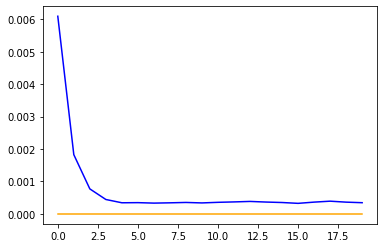

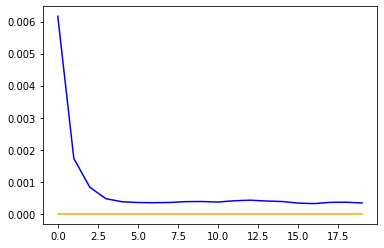

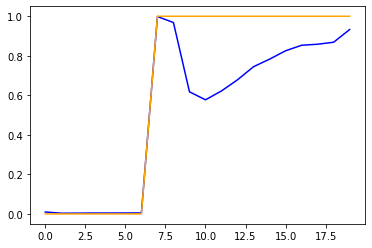

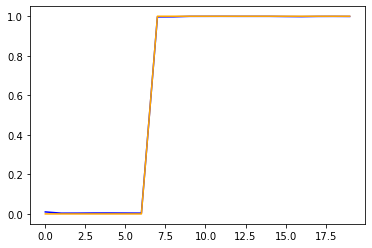

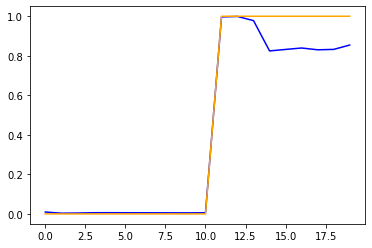

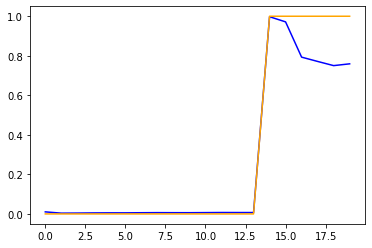

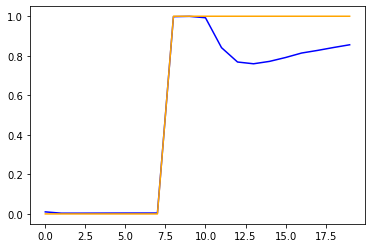

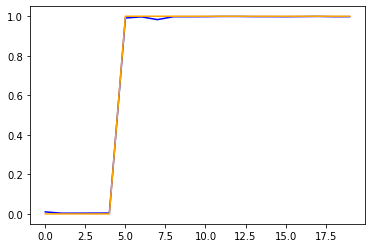

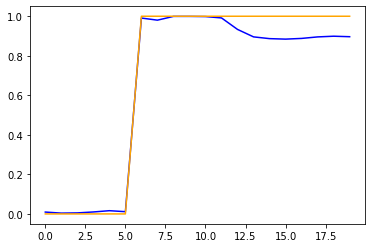

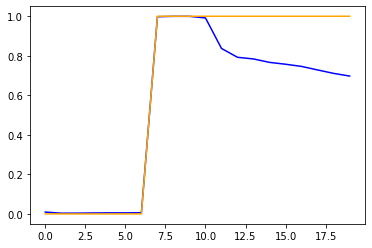

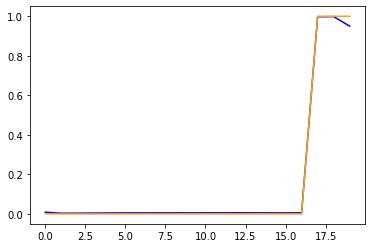

In [8]:
for batch, labels in cpd_model.val_dataloader():
    inp = batch[0]
    pred = cpd_model(inp.unsqueeze(0).float()).squeeze()
    plt.figure()
    plt.plot(pred.detach().cpu().numpy(), label='pred', color='blue')
    plt.plot(labels[0].detach().numpy(), label='true', color='orange')
    

# BCE model

In [9]:
base_model_bce = LSTM(input_size=INPUT_SIZE, n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.5)

bce_model = models.CPD_model(model=base_model_cpd, T=None,
                             loss_type='BCE', experiment_type='human_activity', 
                             lr=0.001, batch_size=64)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [10]:
experiment_name = 'synthetic_new'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

trainer = pl.Trainer(
    max_epochs=50, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[early_stop_callback, checkpoint_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [11]:
trainer.fit(bce_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.118


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.01. New best score: 0.107


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 0.01. New best score: 0.094


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 0.01. New best score: 0.081


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.01. New best score: 0.071


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.060


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 0.01. New best score: 0.044


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.044. Signaling Trainer to stop.


# Combined

In [12]:
base_model_comb = LSTM(input_size=INPUT_SIZE, n_layers=1, hidden_dim=HIDDEN_SIZE, drop_prob=0.25)

combined_model_1 = models.CPD_model(model=base_model_comb, T=None,
                                    loss_type='BCE', experiment_type='human_activity', 
                                    lr=0.001, batch_size=128)

combined_model_2 = models.CPD_model(model=base_model_comb, T=5,
                                    loss_type='CPD', experiment_type='human_activity', 
                                    lr=0.001, batch_size=128)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [13]:
experiment_name = 'ha'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)

early_stop_callback_2 = pl.callbacks.EarlyStopping(
   monitor='val_loss',
   min_delta=0.01,
   patience=5,
   verbose=True,
   mode='min'
)


trainer_1 = pl.Trainer(
    max_epochs=25, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

trainer_2 = pl.Trainer(
    max_epochs=25, 
    gpus='1', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback_2])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [14]:
trainer_1.fit(combined_model_1)
trainer_2.fit(combined_model_2)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.657


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.076 >= min_delta = 0.01. New best score: 0.580


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.098 >= min_delta = 0.01. New best score: 0.482


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.071 >= min_delta = 0.01. New best score: 0.411


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.049 >= min_delta = 0.01. New best score: 0.362


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.037 >= min_delta = 0.01. New best score: 0.324


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.037 >= min_delta = 0.01. New best score: 0.287


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.031 >= min_delta = 0.01. New best score: 0.256


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.027 >= min_delta = 0.01. New best score: 0.229


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 0.01. New best score: 0.212


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.020 >= min_delta = 0.01. New best score: 0.192


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.01. New best score: 0.182


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.023 >= min_delta = 0.01. New best score: 0.159


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.01. New best score: 0.144


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.013 >= min_delta = 0.01. New best score: 0.132


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.120


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.102


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | LSTM    | 1.2 K 
1 | loss  | CPDLoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 40.186


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.143 >= min_delta = 0.01. New best score: 39.043


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.607 >= min_delta = 0.01. New best score: 38.436


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.775 >= min_delta = 0.01. New best score: 37.660


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.451 >= min_delta = 0.01. New best score: 37.209


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.584 >= min_delta = 0.01. New best score: 36.625


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.593 >= min_delta = 0.01. New best score: 36.032


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.563 >= min_delta = 0.01. New best score: 35.469


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.231 >= min_delta = 0.01. New best score: 35.238


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.407 >= min_delta = 0.01. New best score: 34.830


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.702 >= min_delta = 0.01. New best score: 34.128


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.041 >= min_delta = 0.01. New best score: 34.088


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.301 >= min_delta = 0.01. New best score: 33.786


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.321 >= min_delta = 0.01. New best score: 33.465


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.227 >= min_delta = 0.01. New best score: 33.238


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.159 >= min_delta = 0.01. New best score: 33.079


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.468 >= min_delta = 0.01. New best score: 32.611


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.199 >= min_delta = 0.01. New best score: 32.412


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.381 >= min_delta = 0.01. New best score: 32.032


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.297 >= min_delta = 0.01. New best score: 31.735


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.049 >= min_delta = 0.01. New best score: 31.685


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.410 >= min_delta = 0.01. New best score: 31.275


Validating: 0it [00:00, ?it/s]

# Calculate metrics

## Detection curve and Area under detection curve

In [15]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

In [16]:
cpd_model.to('cuda')
(_, _, delay_list, fp_delay_list) = metrics.get_pareto_metrics_for_threshold(cpd_model, 
                                                                             cpd_model.test_dataloader(), 
                                                                             threshold_list,
                                                                             verbose=False)

In [17]:
bce_model.to('cuda')
(_, _, delay_list_bce, fp_delay_list_bce) = metrics.get_pareto_metrics_for_threshold(bce_model, 
                                                                                     cpd_model.test_dataloader(), 
                                                                                     threshold_list,
                                                                                     verbose=False)

In [18]:
combined_model_2.to('cuda')
(_, _, delay_list_comb, fp_delay_list_comb) = metrics.get_pareto_metrics_for_threshold(combined_model_2, 
                                                                                       cpd_model.test_dataloader(), 
                                                                                       threshold_list,
                                                                                       verbose=False)

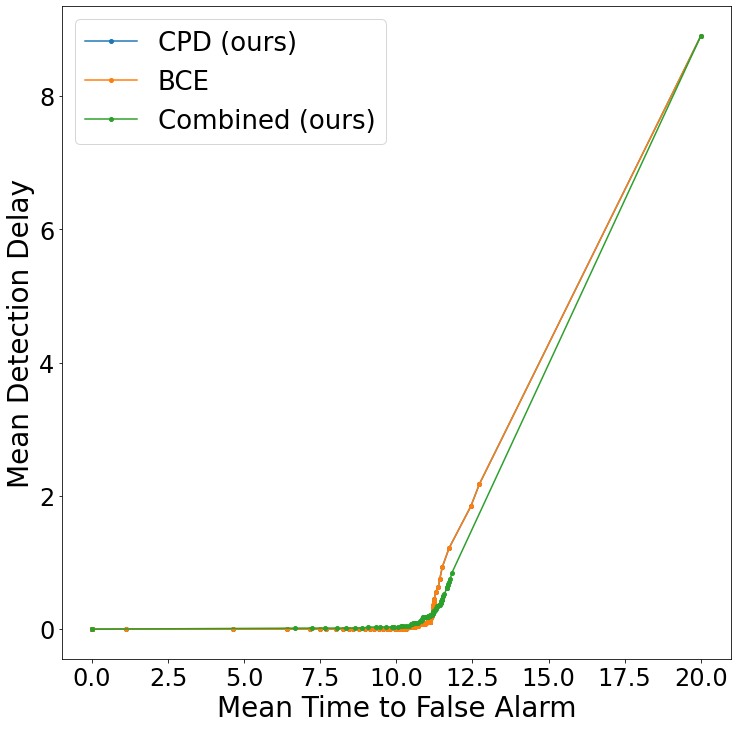

In [19]:
plt.figure(figsize=(12, 12))
plt.plot(fp_delay_list, delay_list, '-o', markersize=4, label='CPD (ours)')
plt.plot(fp_delay_list_bce, delay_list_bce, '-o', markersize=4, label='BCE')
plt.plot(fp_delay_list_comb, delay_list_comb, '-o', markersize=4, label='Combined (ours)')

plt.xlabel('Mean Time to False Alarm', fontsize=28)
plt.ylabel('Mean Detection Delay', fontsize=28)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(loc='upper left', fontsize=26);

In [20]:
print('CPD AUC:', metrics.area_under_graph(delay_list, fp_delay_list))
print('BCE AUC:', metrics.area_under_graph(delay_list_bce, fp_delay_list_bce))
print('COMB AUC:', metrics.area_under_graph(delay_list_comb, fp_delay_list_comb))

CPD AUC: 42.45210031053347
BCE AUC: 42.45210031053347
COMB AUC: 40.40149750862764


## Cover and F1-score

In [21]:
threshold_list = []
threshold_list = [0.001, 0.005] + list(np.round(np.arange(0.1, 1, 0.1), 2))

In [22]:
cpd_cover_dict = {}
bce_cover_dict = {}
comb_cover_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
for th in threshold_list:
    cpd_cover_dict[th] = metrics.cover(cpd_model, cpd_model.val_dataloader(), th)
    bce_cover_dict[th] = metrics.cover(bce_model, cpd_model.val_dataloader(), th)    
    comb_cover_dict[th] = metrics.cover(combined_model_2, cpd_model.val_dataloader(), th)        

In [23]:
metrics_dict = cpd_cover_dict
print('BCE max COVER {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_cover_dict
print('CPD max COVER {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_cover_dict
print('COMB max COVER {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

BCE max COVER 0.984: for threshold 0.9:
CPD max COVER 0.984: for threshold 0.9:
COMB max COVER 0.9891: for threshold 0.9:


In [24]:
cpd_f1_dict = {}
bce_f1_dict = {}
comb_f1_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
for th in threshold_list:
    cpd_f1_dict[th] = metrics.F1_score(cpd_model, cpd_model.val_dataloader(), th)
    bce_f1_dict[th] = metrics.F1_score(bce_model, cpd_model.val_dataloader(), th)    
    comb_f1_dict[th] = metrics.F1_score(combined_model_2, cpd_model.val_dataloader(), th)        

In [25]:
metrics_dict = cpd_f1_dict
print('CPD max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_f1_dict
print('BCE max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_f1_dict
print('COMB max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))


CPD max F1 0.9922: for threshold 0.9:
BCE max F1 0.9922: for threshold 0.9:
COMB max F1 0.9714: for threshold 0.9:


In [26]:
# margin = 10
cpd_f1_lib_dict = {}
bce_f1_lib_dict = {}
comb_f1_lib_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
for th in threshold_list:
    cpd_f1_lib_dict[th] = metrics.F1_score_ruptures(cpd_model, cpd_model.val_dataloader(), th)
    bce_f1_lib_dict[th] = metrics.F1_score_ruptures(bce_model, cpd_model.val_dataloader(), th)    
    comb_f1_lib_dict[th] = metrics.F1_score_ruptures(combined_model_2, cpd_model.val_dataloader(), th)        

In [27]:
metrics_dict = cpd_f1_lib_dict
print('CPD max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_f1_lib_dict
print('BCE max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_f1_lib_dict
print('COMB max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))


CPD max F1 0.9956: for threshold 0.9:
BCE max F1 0.9956: for threshold 0.9:
COMB max F1 0.9956: for threshold 0.9:


In [28]:
# margin = 5
cpd_f1_lib_dict = {}
bce_f1_lib_dict = {}
comb_f1_lib_dict = {}

cpd_model.to('cuda')
bce_model.to('cuda')
for th in threshold_list:
    cpd_f1_lib_dict[th] = metrics.F1_score_ruptures(cpd_model, cpd_model.val_dataloader(), th, margin=5)
    bce_f1_lib_dict[th] = metrics.F1_score_ruptures(bce_model, cpd_model.val_dataloader(), th, margin=5)    
    comb_f1_lib_dict[th] = metrics.F1_score_ruptures(combined_model_2, cpd_model.val_dataloader(), th, margin=5)        

In [30]:
metrics_dict = cpd_f1_lib_dict
print('CPD max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = bce_f1_lib_dict
print('BCE max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))

metrics_dict = comb_f1_lib_dict
print('COMB max F1 {}: for threshold {}:'.format(round(metrics_dict[max(metrics_dict, key=metrics_dict.get)], 4), 
                                               max(metrics_dict, key=metrics_dict.get)))


CPD max F1 0.9947: for threshold 0.9:
BCE max F1 0.9947: for threshold 0.9:
COMB max F1 0.9956: for threshold 0.9:
